In [2]:
from scipy import io
import numpy as np
import pandas as pd
import seaborn as sns

from os import listdir
from os.path import isfile, join
from datetime import datetime

from classes.matlab_reader import matlab_reader
from classes.grid_funcs import map_grid,dataset,data_wizard


grid = map_grid(grid_size=125)
wizard = data_wizard()


In [3]:

def extract_date(filename):
    date_string = filename.split("_")[0]
    date_obj = datetime.strptime(date_string, '%Y%m%d')
    return date_obj.date()



In [9]:
# hold array of mean value over seleted value
means = []

# specify areas we care about (all latitudes abobe 60 degrees (north hemisphere, close to poles))
select_area_indexer = grid.select_area_indexer(
    min_lat= 60,
    max_lat= 90,
    min_lon= -90,
    max_lon= 90)

for year in [2018]:

    FILES = np.sort(listdir(f'AIRS_125KM_{year}/'))
    FILES_DATE = [extract_date(file) for file in FILES]
    
    print("Start Date: ",min(FILES_DATE),"\nEnd Date: ",max(FILES_DATE),"\nDays count: ",len(FILES_DATE), '')

    for file in FILES:
        date = extract_date(file)
        try:
                matlab = matlab_reader(f'AIRS_125KM_{year}/' + file)
                full_data = matlab.select(hemisphere= 'nh', data_field='mfx', daytime='night', altitude=2)  
                    
                selected_data = wizard.data_filtering(select_area_indexer = select_area_indexer ,data = full_data)
                mean = dataset(selected_data).mean
                means.append([mean,date,year])
        except:
            pass

Start Date:  2018-01-01 
End Date:  2018-12-31 
Days count:  364 


/Users/joaojesus/Desktop/FinalYearProject/classes/grid_funcs.py:34: RuntimeWarning: Mean of empty slice
  self.mean = np.nanmean(data)
/Users/joaojesus/Desktop/FinalYearProject/classes/grid_funcs.py:35: RuntimeWarning: All-NaN slice encountered
  self.max = np.nanmax(data)
/Users/joaojesus/Desktop/FinalYearProject/classes/grid_funcs.py:36: RuntimeWarning: All-NaN slice encountered
  self.min = np.nanmin(data)


In [10]:
import matplotlib.pyplot as plt

df = pd.DataFrame(means, columns = ['Mean Daily Temperature','Datetime','Year'])
df['date'] = df['Datetime'].apply(lambda x : x.strftime('%d/%m'))


In [11]:
df

,Mean Daily Temperature,Datetime,Year,date
0,-0.000641,2018-01-01,2018,01/01
1,-0.000978,2018-01-02,2018,02/01
2,-0.000863,2018-01-03,2018,03/01
3,-0.000691,2018-01-04,2018,04/01
4,-0.000944,2018-01-05,2018,05/01
...,...,...,...,...
359,0.000052,2018-12-27,2018,27/12
360,0.000143,2018-12-28,2018,28/12
361,0.000090,2018-12-29,2018,29/12
362,0.000116,2018-12-30,2018,30/12


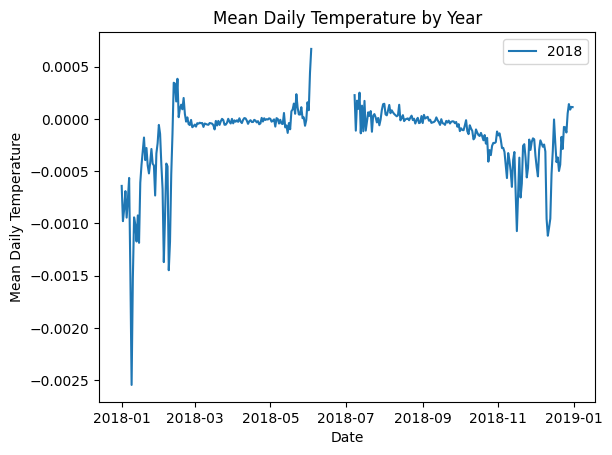

In [12]:
import pandas as pd
import matplotlib.pyplot as plt


# convert date column to datetime format

# group data by year
grouped = df.groupby('Year')

# plot each year's data on a separate plot
for year, data in grouped:
    plt.plot(pd.to_datetime(data['Datetime'], format='%Y-%m-%d'), data['Mean Daily Temperature'], label=year)

# set plot title and axis labels
plt.title('Mean Daily Temperature by Year')
plt.xlabel('Date')
plt.ylabel('Mean Daily Temperature')

# add legend
plt.legend()

# show plot
plt.show()

<Axes: xlabel='date', ylabel='Mean Daily Temperature'>

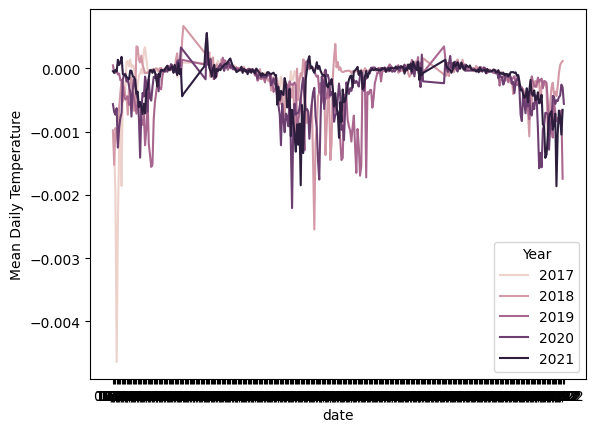

In [8]:
sns.lineplot(x='date', y='Mean Daily Temperature', hue='Year', data=df,)

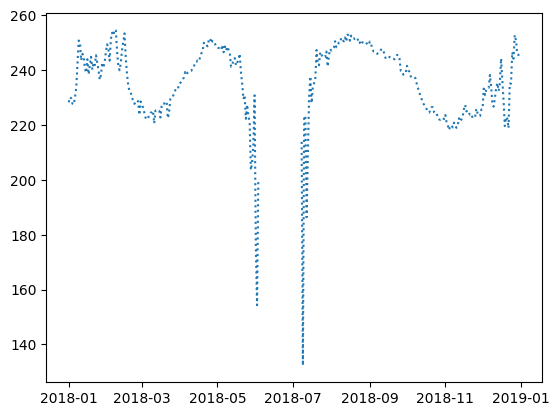

In [8]:
import matplotlib.pyplot as plt
import numpy as np
y = means
x = FILES_DATE[:len(means)]
plt.plot(x,y, linestyle = 'dotted')
plt.show()

In [5]:
np.max(selected_data)

nan

In [6]:
array = np.array([2,4,4,np.nan])